In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Content-based filtering: movie attributes like genre, director and actors. 

Collaborative filtering: users historical preference of movies. It uses ratings of movies in the history and it is assumed that this rating is a predictor for reccomendation in future movie watching behavior. 

In [2]:
ratings = pd.read_csv('/Users/rickvanmil/Downloads/rating.csv')
movies = pd.read_csv('/Users/rickvanmil/Downloads/movie.csv')

In [3]:
movies.head()
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

subset = ratings.sample(n=10000)
print(subset.shape)

(20000263, 4)
(10000, 4)


In [32]:
subset.head()

,movieId,title,userId,rating
1946495,296,Pulp Fiction (1994),14492,2.5
18160425,39446,Saw II (2005),121288,3.5
8832533,1784,As Good as It Gets (1997),90754,4.0
8547857,1681,Mortal Kombat: Annihilation (1997),82788,2.0
11322354,2683,Austin Powers: The Spy Who Shagged Me (1999),84857,2.0


In [ ]:
subset_copy = pd.DataFrame(subset.groupby('title')['rating'].mean())  
subset_copy['total_ratings'] = pd.DataFrame(subset.groupby('title')['rating'].count())

subset_copy.groupby('total_ratings').count()


<AxesSubplot:>

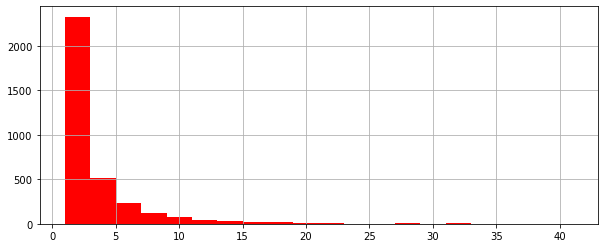

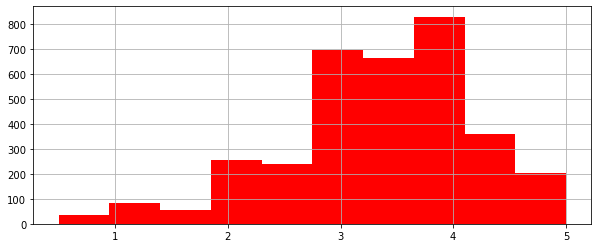

In [51]:
plt.figure(figsize =(10, 4))
subset_copy['total_ratings'].hist(bins = 20, color = 'red')

plt.figure(figsize =(10, 4))
subset_copy['rating'].hist(color = 'red')

In [4]:
user_experience = subset.pivot_table(index=['userId'],columns=['title'],values='rating')
user_experience.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),11:14 (2003),12 Angry Men (1957),12 Years a Slave (2013),...,Zero Effect (1998),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombieland (2009),Zoolander (2001),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
user_experience = user_experience.dropna(thresh=10, axis=1).fillna(0,axis=1)


corrMatrix = user_experience.corr(method='pearson')
corrMatrix.head(100)

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",...,WALL·E (2008),Waterworld (1995),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003)
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),1.000000,-0.001893,-0.001373,-0.001364,-0.002290,-0.001519,-0.001622,-0.001424,-0.001408,-0.001481,...,-0.001563,-0.001586,-0.001394,-0.001442,-0.001446,-0.001613,-0.001333,-0.001379,-0.001694,-0.001405
Ace Ventura: Pet Detective (1994),-0.001893,1.000000,-0.001430,-0.001422,-0.002385,-0.001583,-0.001690,-0.001483,-0.001467,-0.001543,...,-0.001628,-0.001653,-0.001452,-0.001502,-0.001506,-0.001681,-0.001389,-0.001436,-0.001764,-0.001464
Ace Ventura: When Nature Calls (1995),-0.001373,-0.001430,1.000000,-0.001031,-0.001730,-0.001148,-0.001225,-0.001076,-0.001064,-0.001119,...,-0.001181,-0.001199,-0.001053,-0.001089,-0.001092,-0.001219,-0.001008,-0.001042,-0.001280,-0.001061
Air Force One (1997),-0.001364,-0.001422,-0.001031,1.000000,-0.001720,-0.001141,-0.001218,-0.001069,-0.001057,-0.001112,...,-0.001174,-0.001191,-0.001047,-0.001083,-0.001086,-0.001212,-0.001001,-0.001035,-0.001272,-0.001055
Aladdin (1992),-0.002290,-0.002385,-0.001730,-0.001720,1.000000,-0.001914,-0.002044,-0.001794,-0.001774,-0.001867,...,-0.001970,-0.001999,-0.001756,-0.001817,-0.001822,-0.002033,-0.001681,-0.001738,-0.002134,-0.001770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Lock, Stock & Two Smoking Barrels (1998)",-0.001392,-0.001450,-0.001052,-0.001045,-0.001754,-0.001164,-0.001242,-0.001090,-0.001078,-0.001135,...,-0.001197,-0.001215,-0.001068,-0.001104,-0.001108,-0.001236,-0.001021,-0.001056,-0.001297,-0.001076
"Lord of the Rings: The Fellowship of the Ring, The (2001)",-0.001666,-0.001736,-0.001259,-0.001251,-0.002100,-0.001393,-0.001487,-0.001305,-0.001291,-0.001358,...,-0.001433,-0.001455,-0.001278,-0.001322,-0.001326,-0.001479,-0.001223,-0.001264,-0.001553,-0.001288
"Lord of the Rings: The Return of the King, The (2003)",-0.001995,-0.002078,-0.001507,-0.001498,-0.002514,-0.001668,-0.001781,-0.001563,-0.001546,-0.001626,...,-0.001716,-0.001742,-0.001530,-0.001583,-0.001588,-0.001771,-0.001464,-0.001514,-0.001860,-0.001542


Pearson Correlation is used to calculate the item based customer similarities. For example, if two items (in this case movies) are rated, then we make prediction on an item by calculating a weighted average of the ratings on similair items from the user. 

In [6]:
def get_similair(movie_name, rating):
    s_ratings = corrMatrix[movie_name]*(rating-2.5)
    s_ratings = s_ratings.sort_values(ascending=False)
    return s_ratings

In [21]:
fantasy = [("2001: A Space Odyssey (1968)",5),("Apollo 13 (1995)",5),("Lock, Stock & Two Smoking Barrels (1998)",1),("Aladdin (1992)",2), ("Star Wars: Episode VI - Return of the Jedi (1983)",4),]
recom = pd.DataFrame()
for movie,rating in fantasy:
    recom = recom.append(get_similair(movie,rating),ignore_index = True)

recom.head(10)

,2001: A Space Odyssey (1968),Indiana Jones and the Last Crusade (1989),"Mummy, The (1999)",Dirty Dancing (1987),"Wizard of Oz, The (1939)",Back to the Future Part III (1990),"Cable Guy, The (1996)",Air Force One (1997),Beetlejuice (1988),"Untouchables, The (1987)",...,Star Wars: Episode VI - Return of the Jedi (1983),"Lion King, The (1994)",Star Wars: Episode IV - A New Hope (1977),"Matrix, The (1999)",Jurassic Park (1993),Apollo 13 (1995),"Shawshank Redemption, The (1994)",Braveheart (1995),Schindler's List (1993),Pulp Fiction (1994)
0,2.500000,0.120546,-0.003309,-0.003314,-0.003334,-0.003357,-0.003381,-0.003411,-0.003414,-0.003414,...,-0.005895,-0.006003,-0.006007,-0.006145,-0.006164,-0.006166,-0.006267,-0.006272,-0.006470,-0.007053
1,-0.006166,-0.006188,-0.004492,-0.004500,-0.004526,-0.004558,-0.004591,-0.004631,-0.004635,-0.004635,...,-0.008003,-0.008149,-0.008156,-0.008343,-0.008368,2.500000,-0.008509,-0.008516,-0.008784,-0.009576
2,0.002088,0.002095,0.001521,0.001523,0.001532,0.001543,0.001554,0.001568,0.001569,0.001569,...,0.002709,0.002759,0.002761,0.002825,0.002833,0.002834,0.002881,0.002883,0.002974,0.003242
3,0.001145,0.001149,0.000834,0.000835,0.000840,0.000846,0.000852,0.000860,0.000860,0.000861,...,0.001486,0.001513,0.001514,0.001549,0.001554,0.001554,0.001580,0.001581,0.001631,0.001778
4,-0.003537,-0.003549,-0.002577,-0.002581,-0.002596,-0.002614,-0.002633,-0.002656,-0.002658,-0.002659,...,1.500000,-0.004674,-0.004678,-0.004785,-0.004800,-0.004802,-0.004880,-0.004884,-0.005038,-0.005492


In [22]:
recom.sum().sort_values(ascending=False).head(20)

2001: A Space Odyssey (1968)                         2.493529
Apollo 13 (1995)                                     2.493420
Star Wars: Episode VI - Return of the Jedi (1983)    1.490298
Indiana Jones and the Last Crusade (1989)            0.114053
Dracula (Bram Stoker's Dracula) (1992)               0.102361
Mummy, The (1999)                                   -0.008023
Dirty Dancing (1987)                                -0.008036
Wizard of Oz, The (1939)                            -0.008083
Back to the Future Part III (1990)                  -0.008140
Cable Guy, The (1996)                               -0.008199
Air Force One (1997)                                -0.008271
Beetlejuice (1988)                                  -0.008277
Untouchables, The (1987)                            -0.008279
Ace Ventura: When Nature Calls (1995)               -0.008321
Beautiful Mind, A (2001)                            -0.008333
X-Files: Fight the Future, The (1998)               -0.008357
O Brothe